<a href="https://colab.research.google.com/github/charookc5/AIML_internship/blob/main/AIML_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import libraries and load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')  # Adjust path if needed

# View basic info
print(df.head())
print(df.info())
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

2. Handle missing values

In [2]:
# Check missing values
print(df.isnull().sum())

# Age – fill with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarked – fill with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Cabin – too many missing, drop it
df.drop(columns=['Cabin'], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-2182014208.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2182014208.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

3. Convert categorical features into numerical

In [3]:
# Convert 'Sex' to binary
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


4. Normalize/Standardize numerical features

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


5. Visualize outliers with boxplots and remove them

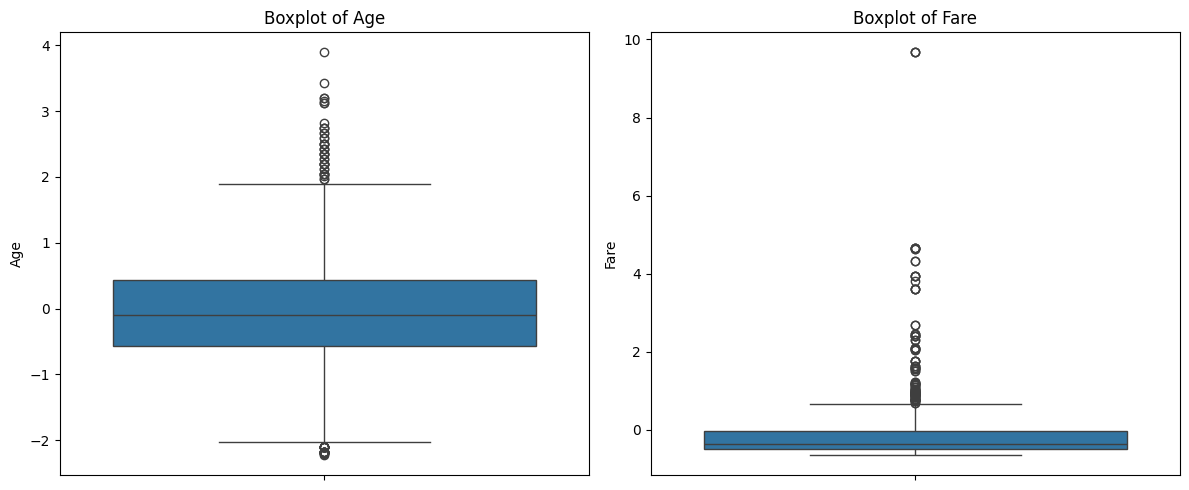

In [5]:
# Boxplots to visualize
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=df)
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=df)
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()

# Remove outliers using IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')


✅ Final Cleaned Data

In [6]:
print(df.head())
print(df.isnull().sum())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0 -0.565736      1      0   
2                        Heikkinen, Miss. Laina    1 -0.258337      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1      0   
4                      Allen, Mr. William Henry    0  0.433312      0      0   
5                              Moran, Mr. James    0 -0.104637      0      0   

             Ticket      Fare  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445       False        True  
2  STON/O2. 3101282 -0.488854       False        True  
3            113803  0.420730       False        True  
4            373450 -0.486337       False        True  
5            330877 -0